# Univariate plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/skaZPhb.png" width="350px"/></td>
<td><img src="https://i.imgur.com/gaNttYd.png" width="350px"/></td>
<td><img src="https://i.imgur.com/pampioh.png"/></td>
<td><img src="https://i.imgur.com/OSbuszd.png"/></td>

<!--<td><img src="https://i.imgur.com/ydaMhT1.png" width="350px"/></td>
<td><img src="https://i.imgur.com/WLAqDSV.png" width="350px"/></td>
<td><img src="https://i.imgur.com/Tj2y9gH.png"/></td>
<td><img src="https://i.imgur.com/X0qXLCu.png"/></td>-->
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Bar Chat</td>
<td style="font-weight:bold; font-size:16px;">Line Chart</td>
<td style="font-weight:bold; font-size:16px;">Area Chart</td>
<td style="font-weight:bold; font-size:16px;">Histogram</td>
</tr>
<tr>
<td>df.plot.bar()</td>
<td>df.plot.line()</td>
<td>df.plot.area()</td>
<td>df.plot.hist()</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>	Good for ordinal categorical and interval data.</td>
<td>Good for ordinal categorical and interval data.</td>
<td>Good for interval data.</td>
</tr>
</table>

The `pandas` library is the core library for Python data analysis: the "killer feature" that makes the entire ecosystem stick together. However, it can do more than load and transform your data: it can visualize it too! Indeed, the easy-to-use and expressive pandas plotting API is a big part of `pandas` popularity.

In this section we will learn the basic `pandas` plotting facilities, starting with the simplest type of visualization: single-variable or "univariate" visualizations. This includes basic tools like bar plots and line charts. Through these we'll get an understanding of `pandas` plotting library structure, and spend some time examining data types.

In [9]:
import pandas as pd
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head(10)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


## Bar charts and categorical data

Bar charts are arguably the simplest data visualization. They map categories to numbers: the amount of eggs consumed for breakfast (a category) to a number breakfast-eating Americans, for example; or, in our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number):

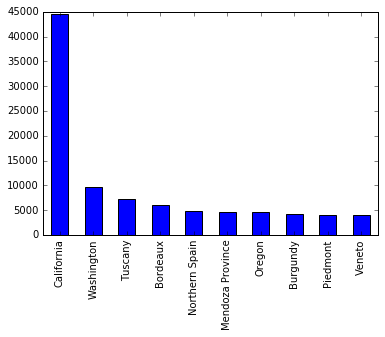

In [10]:
%matplotlib inline

reviews['province'].value_counts().head(10).plot.bar()

What does this plot tell us? It says California produces far more wine than any other province of the world! We might ask what percent of the total is Californian vintage? This bar chart tells us absolute numbers, but it's more useful to know relative proportions. No problem:

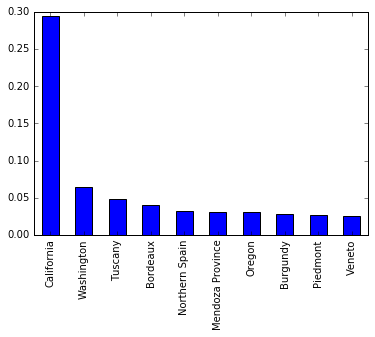

In [11]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

California produces almost a third of wines reviewed in Wine Magazine!

Bar charts are very flexible: The height can represent anything, as long as it is a number. And each bar can represent anything, as long as it is a category.

In this case the categories are **nominal categories**: "pure" categories that don't make a lot of sense to order. Nominal categorical variables include things like countries, ZIP codes, types of cheese, and lunar landers. The other kind are **ordinal categories**: things that do make sense to compare, like earthquake magnitudes, housing complexes with certain numbers of apartments, and the sizes of bags of chips at your local deli.

Or, in our case, the number of reviews of a certain score allotted by Wine Magazine:

In [14]:
reviews['points'].value_counts().sort_index()

80       898
81      1502
82      4041
83      6048
84     10708
85     12411
86     15573
87     20747
88     17871
89     12921
90     15973
91     10536
92      9241
93      6017
94      3462
95      1716
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

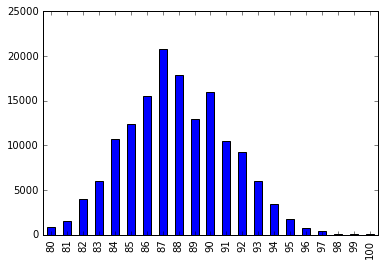

In [12]:
reviews['points'].value_counts().sort_index().plot.bar()

As you can see, every vintage is allotted an overall score between 80 and 100; and, if we are to believe that Wine Magazine is an arbiter of good taste, then a 92 is somehow meaningfully "better" than a 91.

## Line charts

The wine review scorecard has 20 different unique values to fill, for which our bar chart is just barely enough. What would we do if the magazine rated things 0-100? We'd have 100 different categories; simply too many to fit a bar in for each one!

In that case, instead of bar chart, we could use a line chart:

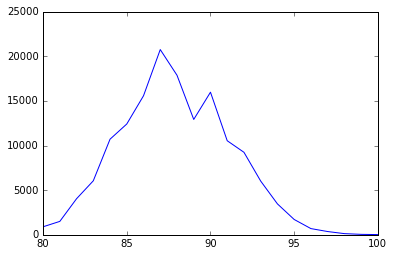

In [21]:
reviews['points'].value_counts().sort_index().plot.line()

A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Line charts also make it harder to distinguish between individual values.

In general, if your data can fit into a bar chart, just use a bar chart!

## Quick break: bar or line

Let's do a quick exercise. Suppose that we're interested in counting the following variables:

1. The number of tubs of ice cream purchased by flavor, given that there are 5 different flavors.
2. The average number of cars purchased from American car manufacturers in Michigan.
3. Test scores given to students by teachers at a college, on a 0-100 scale.
4. The number of restaurants located on the street by the name of the street in Lower Manhattan.

For which of these would a bar chart be better? Which ones would be better off with a line?

To see the answer, click the "Output" button on the code block below.

In [22]:
raw = """
<ol>
<li>This is a simple nominal categorical variable. Five bars will fit easily into a display, so a bar chart will do!</li>
<br/>
<li>This example is similar: nominal categorical variables. There are probably more than five American car manufacturers, so the chart will be a little more crowded, but a bar chart will still do it.</li>
<br/>
<li>This is an ordinal categorical variable. We have a lot of potential values between 0 and 100, so a bar chart won't have enough room. A line chart is better.</li>
<br/>
<li>
<p>Number 4 is a lot harder. City streets are obviously ordinary categorical variables, so we *ought* to use a bar chart; but there are a lot of streets out there! We couldn't possibly fit all of them into a display.</p>
<p>Sometimes, your data will have too many points to do something "neatly", and that's OK. If you organize the data by value count and plot a line chart over that, you'll learn valuable information about *percentiles*: that a street in the 90th percentile has 20 restaurants, for example, or one in the 50th just 6. This is basically a form of aggregation: we've turned streets into percentiles!</p> 
<p>The lesson: your *interpretation* of the data is more important than the tool that you use.</p></li>
</ol>
"""

from IPython.display import HTML
HTML(raw)

## Area charts

Area charts are just line charts, but with the bottom shaded in. That's it!

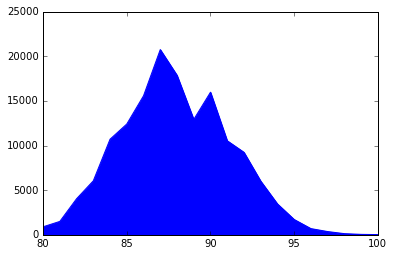

In [23]:
reviews['points'].value_counts().sort_index().plot.area()

When plotting only one variable, the difference between an area chart and a line chart is mostly visual. In this context, they can be used interchangably.

## Interval data

Let's move on by looking at yet another type of data, an **interval variable**.

Examples of interval variables are the wind speed in a hurricane, shear strength in concrete, and the temperature of the sun. An interval variable goes beyond a nominal categorical variable: it has a *meaningful* order, in the sense that we can quantify what the difference between two entries is itself an interval variable.

For example, if I say that this sample of water is -20 degrees Celcius, and this other sample is 120 degrees Celcius, then I can quantify the difference between them: 140 degrees "worth" of heat, or such-and-such many joules of energy.

The difference can be qualitative sometimes. At a minimum, being able to state something so clearly feels a lot more "measured" than, say, saying you'll buy this wine and not that one, because this one scored a 92 on some taste test and that one only got an 85. More definitively, any variable that has infinitely many possible values is definitely an interval variable (why not 120.1 degrees? 120.001? 120.0000000001? Etc).

Line charts work well for interval data. Bar charts don't—unless your ability to measure it is very limited, interval data will naturally vary by quite a lot.

Let's apply a new tool, the histogram, to an interval variable in our dataset, price (we'll cut price off at 200$ a bottle; more on why shortly).

## Histograms

Here's a histogram:

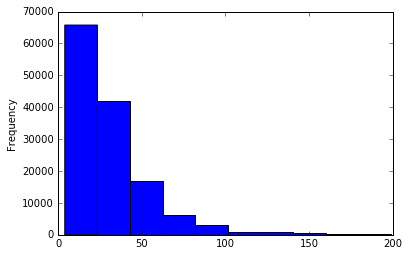

In [24]:
reviews[reviews['price'] < 200]['price'].plot.hist()

A histogram looks, trivially, like a bar plot. And it basically is! In fact, a histogram is special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars. The only analytical difference is that instead of each bar representing a single value, it represents a range of values.

However, histograms have one major shortcoming (the reason for our 200$ caveat earlier). Because they break space up into even intervals, they don't deal very well with skewed data:

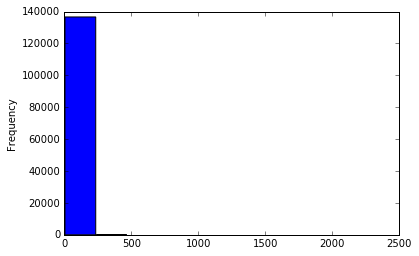

In [25]:
reviews['price'].plot.hist()

This is the real reason I excluded the >$200 bottles earlier; some of these vintages are really expensive! And the chart will "grow" to include them, to the detriment of the rest of the data being shown.

In [26]:
reviews[reviews['price'] > 1500]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


There are many ways of dealing with the skewed data problem; those are outside the scope of this tutorial. The easiest is to just do what I did: cut things off at a sensible level.

This phenomenon is known (statistically) as **skew**, and it's a fairly common occurance among interval variables.

Histograms work best for interval variables without skew. They also work really well for nominal categorical variables like `points`:

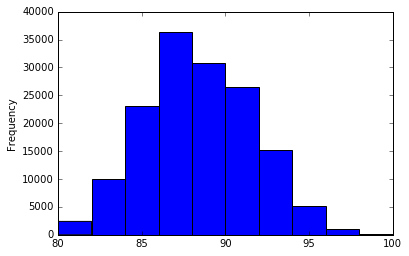

In [27]:
reviews['points'].plot.hist()

## Exercise: bar, line/area, or histogram?

Let's do another exercise. What would the best chart type be for:

1. The volume of apples picked at an orchard based on the type of apple (Granny Smith, Fuji, etcetera).
2. The number of points won in all basketball games in a season.
3. The count of apartment buildings in Chicago by the number of individual units.

To see the answer, click the "Output" button on the code block below.

In [28]:
raw = """
<ol>
<li>Example number 1 is a nominal categorical example, and hence, a pretty straightfoward bar graph target.</li>
<br/>
<li>Example 2 is a large nominal categorical variable. A basketball game team can score between 50 and 150 points, too much for a bar chart; a line chart is a good way to go. A histogram could also work.</li>
<br/>
<li>Example 3 is an interval variable: a single building can have anywhere between 1 and 1000 or more apartment units. A line chart could work, but a histogram would probably work better! Note that this distribution is going to have a lot of skew (there is only a handful of very, very large apartment buildings).</li>
</ol>
"""

from IPython.display import HTML
HTML(raw)

## Conclusion and exercise

In this section of the tutorial we learned about the handful of different kinds of data, and looked at some of the built-in tools that `pandas` provides us for plotting them.

Now it's your turn!

For these exercises, we'll be working with the Pokemon dataset (because what goes together better than wine and Pokemon?).

In [30]:
pd.set_option('max_columns', None)
pokemon = pd.read_csv("pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


Try forking this kernel, and see if you can replicate the following plots. To see the answers, click the "Input" button to unhide the code and see the answers.

The frequency of Pokemon by type:

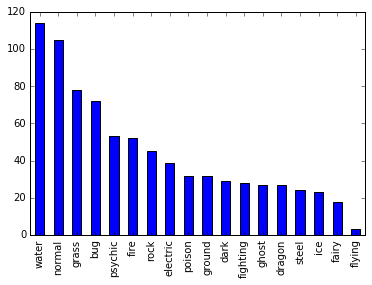

In [31]:
pokemon['type1'].value_counts().plot.bar()

The frequency of Pokemon by HP stat total:

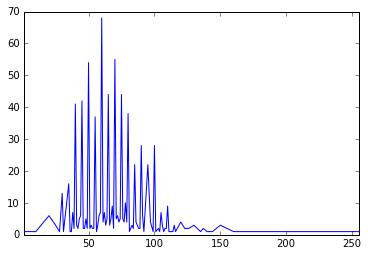

In [32]:
pokemon['hp'].value_counts().sort_index().plot.line()

The frequency of Pokemon by weight:

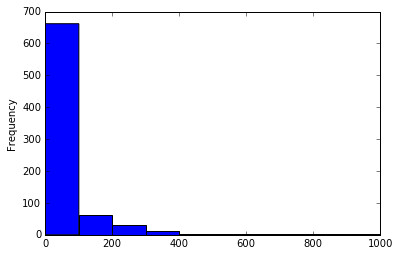

In [33]:
pokemon['weight_kg'].plot.hist()

[Click here to move on to "Bivariate plotting with pandas"](https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas/).

You may also want to take a look at [the addendum on pie charts](https://www.kaggle.com/residentmario/data-visualization-addendum-pie-charts/).